In [1]:
### Reading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 
data =pd.read_csv("KDDCup99.csv")
data.head()
data.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,494010,494011,494012,494013,494014,494015,494016,494017,494018,494019
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#Finding missing data
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate   

In [3]:
#creating a CSV file with attribute names 
with open('KDDCup99-preprocessed.csv', 'w',newline='') as out:
    writer=csv.writer(out)
    writer.writerow(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label'])

In [4]:
#Extracting DoS Attacks from dataset
a=['back','land','neptune','pod','smurf','teardrop','normal']
with open('KDDCup99.csv', 'r') as inp, open('KDDCup99-preprocessed.csv', 'a',newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[41] in a:
            writer.writerow(row)

In [5]:
#Creating new dataframe with modified dataset
%pylab inline
datapre=pd.read_csv("KDDCup99-preprocessed.csv")
datapre.head()
datapre.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11},
                "label":{"normal":0, "back":1, "land":2, "neptune":3, "pod":4, "smurf":5, "teardrop":6}}
#Replacing the encoded data in the dataset
datapre.replace(cleanup_nums, inplace=True)
datapre.head()
datapre.transpose()

,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
service,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
flag,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = datapre.columns.tolist()
cols

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [8]:
#reordering columns
cols.insert(0, cols.pop(cols.index('label')))
cols

['label',
 'duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [9]:
datapre = datapre.reindex(columns= cols)

In [10]:
datapre

,label,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,1,33,3,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,0,1,33,3,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,0,1,33,3,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,0,1,33,3,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,0,1,33,3,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488730,0,0,1,33,3,310,1881,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
488731,0,0,1,33,3,282,2286,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
488732,0,0,1,33,3,203,1200,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
488733,0,0,1,33,3,291,1200,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [11]:
X = datapre.iloc[:,1:42].values
y = datapre.iloc[:,0].values
X

array([[0, 1, 33, ..., 0.0, 0.0, 0.0],
       [0, 1, 33, ..., 0.0, 0.0, 0.0],
       [0, 1, 33, ..., 0.0, 0.0, 0.0],
       ...,
       [0, 1, 33, ..., 0.01, 0.0, 0.0],
       [0, 1, 33, ..., 0.01, 0.0, 0.0],
       [0, 1, 33, ..., 0.01, 0.0, 0.0]], dtype=object)

In [12]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
np.shape(X)

(488735, 41)

In [14]:
np.shape(y)

(488735,)

In [15]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [16]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00000205  0.16001984 -0.06252486 ... -0.03189695 -0.01550846
  -0.01307907]
 [ 0.16001984  1.00000205  0.71649585 ... -0.554418   -0.27981068
  -0.28577878]
 [-0.06252486  0.71649585  1.00000205 ... -0.3271059  -0.2067093
  -0.20358365]
 ...
 [-0.03189695 -0.554418   -0.3271059  ...  1.00000205 -0.11233131
  -0.11145097]
 [-0.01550846 -0.27981068 -0.2067093  ... -0.11233131  1.00000205
   0.989131  ]
 [-0.01307907 -0.28577878 -0.20358365 ... -0.11145097  0.989131
   1.00000205]]


Text(0.5, 1, 'Correlation between different features')

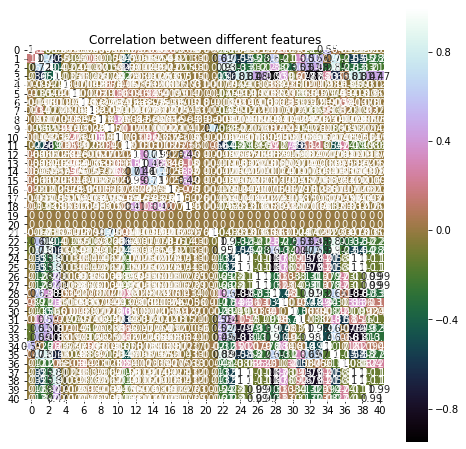

In [17]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [18]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.12621729e-02  1.49273484e-03 -7.80791683e-03 ... -1.89937266e-05
   0.00000000e+00  0.00000000e+00]
 [ 2.40864280e-01 -9.86955725e-02  1.35710948e-01 ...  2.63277442e-04
   0.00000000e+00  0.00000000e+00]
 [ 2.13426084e-01 -1.81148082e-01  2.76883834e-01 ...  1.01371860e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.61611065e-01 -2.45281520e-01 -8.15169499e-03 ...  4.53988023e-01
   0.00000000e+00  0.00000000e+00]
 [-1.08202747e-01  3.36883477e-01  2.99200658e-01 ... -2.57543994e-02
   0.00000000e+00  0.00000000e+00]
 [-1.08099620e-01  3.36263664e-01  2.99748065e-01 ...  1.74317969e-02
   0.00000000e+00  0.00000000e+00]]

Eigenvalues 
[9.93046064e+00 4.72640607e+00 3.69747809e+00 3.12733226e+00
 1.81279881e+00 1.72970418e+00 1.38304124e+00 1.11398520e+00
 1.04208459e+00 1.00409987e+00 9.99983996e-01 9.96798597e-01
 9.86733805e-01 8.67688787e-01 8.09755298e-01 7.83887914e-01
 7.46075127e-01 6.95551039e-01 6.53660766e-01 4.11120421e-01
 3.25553360e-01 3.01708200e-01 

In [19]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.930460642868368
4.7264060736243785
3.69747808852237
3.1273322590127797
1.812798814221451
1.729704182504332
1.3830412424701
1.1139852003515225
1.0420845894473192
1.0040998734463136
0.9999839956614202
0.9967985971645935
0.9867338052647993
0.8676887870653595
0.8097552980113705
0.783887913683098
0.7460751272589004
0.6955510393523976
0.653660765607416
0.41112042058240167
0.3255533602740553
0.30170819965045065
0.27016076841191405
0.24570096442723757
0.11580762590746684
0.08439984053203282
0.04115563604181874
0.02112789411480084
0.018083597091301876
0.015323497189461362
0.011166728337007232
0.009356905698295725
0.006128237456958612
0.005760132476382415
0.005434489132282021
0.002137250854118202
0.0013298168047986324
0.0007015352181847438
0.00039660226943179927
0.0
0.0


In [20]:
datapre.drop('hot', axis = 1, inplace = True)
print("Dropping hot")
datapre.drop('num_failed_logins', axis = 1, inplace = True)
print("Dropping num_failed_logins")
datapre.drop('logged_in', axis = 1, inplace = True)
print("Dropping logged_in")
datapre.drop('lnum_compromised', axis = 1, inplace = True)
print("Dropping lnum_compromised")
datapre.drop('lroot_shell', axis = 1, inplace = True)
print("Dropping lroot_shell")
datapre.drop('lsu_attempted', axis = 1, inplace = True)
print("Dropping lsu_attempted")
datapre.drop('lnum_root', axis = 1, inplace = True)
print("Dropping lnum_root")
datapre.drop('lnum_file_creations', axis = 1, inplace = True)
print("Dropping lnum_file_creations")
datapre.drop('lnum_shells', axis = 1, inplace = True)
print("Dropping lnum_shells")
datapre.drop('lnum_access_files', axis = 1, inplace = True)
print("Dropping lnum_access_files")
datapre.drop('lnum_outbound_cmds', axis = 1, inplace = True)
print("Dropping lnum_outbound_cmds")
datapre.drop('is_host_login', axis = 1, inplace = True)
print("Dropping is_host_login")
datapre.drop('is_guest_login', axis = 1, inplace = True)
print("Dropping is_guest_login")
datapre.drop('count', axis = 1, inplace = True)
print("Dropping count")
datapre.drop('srv_count', axis = 1, inplace = True)
print("Dropping srv_count")
datapre.drop('serror_rate', axis = 1, inplace = True)
print("Dropping serror_rate")
datapre.drop('srv_serror_rate', axis = 1, inplace = True)
print("Dropping srv_serror_rate")
datapre.drop('rerror_rate', axis = 1, inplace = True)
print("Dropping rerror_rate")
datapre.drop('srv_rerror_rate', axis = 1, inplace = True)
print("Dropping srv_rerror_rate")
datapre.drop('diff_srv_rate', axis = 1, inplace = True)
print("Dropping diff_srv_rate")
datapre.drop('same_srv_rate', axis = 1, inplace = True)
print("Dropping same_srv_rate")
datapre.drop('srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping srv_diff_host_rate")
datapre.drop('dst_host_count', axis = 1, inplace = True)
print("dst_host_count")
datapre.drop('dst_host_srv_count', axis = 1, inplace = True)
print("Dropping dst_host_srv_count")
datapre.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)
print("Dropping dst_host_diff_srv_rate")
datapre.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_diff_host_rate")
datapre.drop('dst_host_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_serror_rate")
datapre.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_serror_rate")
datapre.drop('dst_host_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_rerror_rate")
datapre.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_rerror_rate")
datapre.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
print("Dropping dst_host_same_srv_rate")
datapre.drop('dst_host_same_src_port_rate', axis = 1, inplace = True)
print("Dropping dst_host_same_src_port_rate")

Dropping hot
Dropping num_failed_logins
Dropping logged_in
Dropping lnum_compromised
Dropping lroot_shell
Dropping lsu_attempted
Dropping lnum_root
Dropping lnum_file_creations
Dropping lnum_shells
Dropping lnum_access_files
Dropping lnum_outbound_cmds
Dropping is_host_login
Dropping is_guest_login
Dropping count
Dropping srv_count
Dropping serror_rate
Dropping srv_serror_rate
Dropping rerror_rate
Dropping srv_rerror_rate
Dropping diff_srv_rate
Dropping same_srv_rate
Dropping srv_diff_host_rate
dst_host_count
Dropping dst_host_srv_count
Dropping dst_host_diff_srv_rate
Dropping dst_host_srv_diff_host_rate
Dropping dst_host_serror_rate
Dropping dst_host_srv_serror_rate
Dropping dst_host_rerror_rate
Dropping dst_host_srv_rerror_rate
Dropping dst_host_same_srv_rate
Dropping dst_host_same_src_port_rate


In [21]:
datapre.label.unique()

array([0, 3, 5, 4, 6, 2, 1], dtype=int64)

In [22]:
datapre.to_csv('finalKDD.csv')

In [23]:
datapre.head()

,label,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent
0,0,0,1,33,3,181,5450,0,0,0
1,0,0,1,33,3,239,486,0,0,0
2,0,0,1,33,3,235,1337,0,0,0
3,0,0,1,33,3,219,1337,0,0,0
4,0,0,1,33,3,217,2032,0,0,0


In [24]:
datapre.shape

(488735, 10)

In [25]:
#del(datapre)
import pandas as pd
datapre=pd.read_csv('./finalKDD.csv')

In [26]:
sampleset1=datapre

In [27]:
type(sampleset1)

pandas.core.frame.DataFrame

In [28]:
sampleset2=sampleset1

In [29]:
sampleset2=sampleset2.append(datapre)

In [30]:
sampleset2.shape

(977470, 11)

In [31]:
sampleset1.shape

(488735, 11)

In [32]:
#Sampling 50% of the data with replacement
#from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.4, random_state=1)
sampleset1

,Unnamed: 0,label,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent
437441,437441,5,0,2,66,3,520,0,0,0,0
133305,133305,5,0,2,66,3,1032,0,0,0,0
453626,453626,0,0,3,40,3,516,4,0,0,0
214539,214539,5,0,2,66,3,1032,0,0,0,0
240083,240083,5,0,2,66,3,1032,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
468984,468984,3,0,1,44,11,0,0,0,0,0
26441,26441,0,0,1,30,3,383,0,0,0,0
143368,143368,0,0,1,33,11,0,0,0,0,0
311611,311611,5,0,2,66,3,1032,0,0,0,0


In [33]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset2.values
x=array[:,0:9]
print(x)
y=array[:,9]
print(y)

[[     0      0      0 ...    181   5450      0]
 [     1      0      0 ...    239    486      0]
 [     2      0      0 ...    235   1337      0]
 ...
 [488732      0      0 ...    203   1200      0]
 [488733      0      0 ...    291   1200      0]
 [488734      0      0 ...    219   1234      0]]
[0 0 0 ... 0 0 0]


In [34]:
x.shape

(977470, 9)

In [35]:
y.shape

(977470,)

In [36]:
#Cross validation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = model_selection.train_test_split(x, y, test_size=0.8, random_state=0)

In [37]:
features_train.shape

(195494, 9)

In [38]:
labels_test.shape

(781976,)

In [39]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [40]:
features_train

array([[458649,      3,      0, ...,      0,      0,      0],
       [267356,      5,      0, ...,   1032,      0,      0],
       [  3994,      0,      1, ...,   4173,    324,      0],
       ...,
       [117952,      3,      0, ...,      0,      0,      0],
       [435829,      5,      0, ...,    520,      0,      0],
       [305711,      5,      0, ...,   1032,      0,      0]], dtype=int64)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [42]:
labels_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#Naive Bayes Classifier
accu=[]
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
features_train=features_train.astype(int) 
labels_train=labels_train.astype(int)
labels_test=labels_test.astype(int)
#training the model using training set
clf.fit(features_train , labels_train)
#predicting the label using test set on trained Model
prediction = clf.predict(features_test)
#calculating accuracy
acc1=accuracy_score(prediction, labels_test)
accu.append(acc1*100)
print("------------------------------------------")
print("Accuracy  : ",acc1*100," %")

------------------------------------------
Accuracy  :  99.74052912109835  %


In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
y_pred = classifier.predict(features_test)

In [46]:
acc=accuracy_score(y_pred,labels_test)
accu.append(acc*100)
print("Accuracy  : ",acc*100," %")

Accuracy  :  99.94386016962157  %


In [47]:
#WRITE A CODE USING PYTHON TO SENDs A MAIL USING SMTP LIBRARY
import smtplib
s=smtplib.SMTP('smtp.gmail.com',587)
#start TLS for security
s.starttls()
#authentication 
s.login("sheetalakki199@gmail.com","sheetu*123")
#message to be sent
subject="DDoS Attack Detaction using Machine learning";
TEXT="Accuracy of Navive Bayes =",acc1*100 ,"knn =",acc*100


message='Subject:{}\n\n{}'.format(subject,TEXT)
#sending the mail
s.sendmail("sheetalakki199@gmail.com","sheetalakki199@gmail.com",message)

#terminating the session
s.quit()

(221, b'2.0.0 closing connection io3sm4758875pjb.22 - gsmtp')